<a href="https://colab.research.google.com/github/nguyen-minh-16-06/Hocmay1/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ỨNG DỤNG DỰ ĐOÁN CHI PHÍ BẢO HIỂM**

**KHAI BÁO THƯ VIỆN**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**THÔNG TIN VỀ DỮ LIỆU**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nguyen-minh-16-06/python-dataset/refs/heads/main/insurance.csv")
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
df.duplicated().value_counts()

,count
False,1337
True,1


In [ ]:
df_processed = df.drop_duplicates()
df_processed.duplicated().value_counts()

,count
False,1337


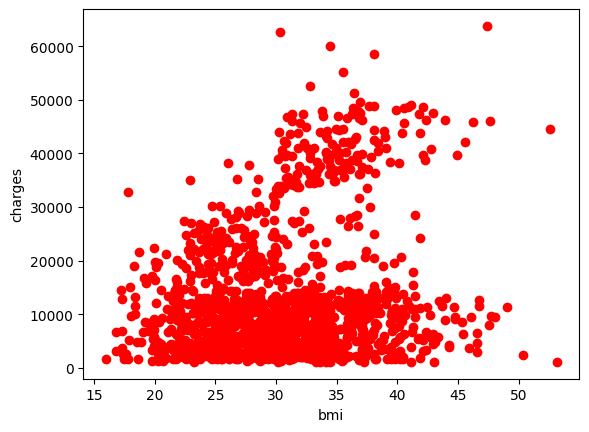

In [ ]:
plt.scatter(df_processed["bmi"], df_processed["charges"], color = "red")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

In [ ]:
_havesmk = df_processed.loc[df_processed["smoker"] == "yes"]
_havesmk

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


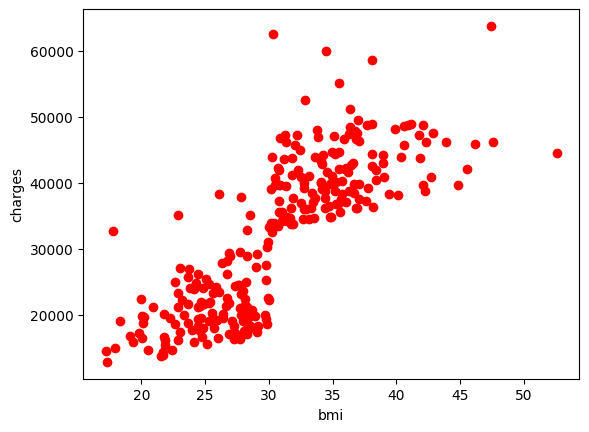

In [ ]:
plt.scatter(_havesmk["bmi"], _havesmk["charges"], color = "red")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

**XỬ LÝ GIÁ TRỊ NGOẠI LAI**

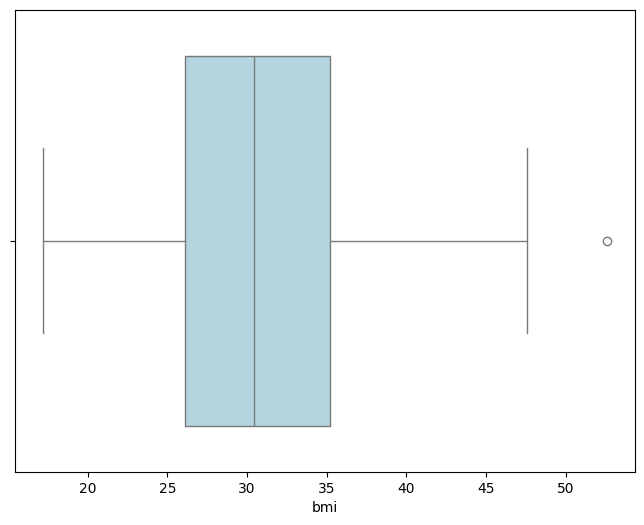

In [ ]:
sns.boxplot(x = _havesmk["bmi"], color = "lightblue")
plt.xlabel("bmi")
plt.show()

In [ ]:
Q1 = _havesmk["bmi"].quantile(0.25)
Q3 = _havesmk["bmi"].quantile(0.75)
IQR = Q3 - Q1
above = Q3 + 1.5 * IQR
below = Q1 - 1.5 * IQR

In [ ]:
_havesmk_IQR = _havesmk[(_havesmk["bmi"] <= above) & (_havesmk["bmi"] >= below)]
_havesmk_IQR

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


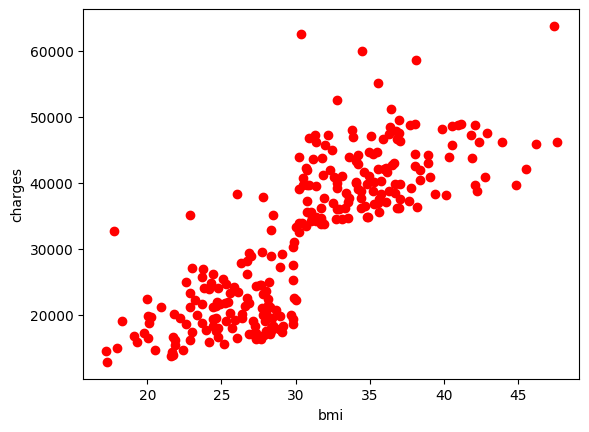

In [ ]:
plt.scatter(_havesmk_IQR["bmi"], _havesmk_IQR["charges"], color = "red")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

**CHUẨN HOÁ DỮ LIỆU**

In [ ]:
_X = _havesmk_IQR.bmi.values.reshape(-1, 1)
_Y = _havesmk_IQR.charges.values.reshape(-1, 1)

X_min = np.min(_X)
X_max = np.max(_X)
Y_min = np.min(_Y)
Y_max = np.max(_Y)

X_norm = (_X - X_min) / (X_max - X_min)
Y_norm = (_Y - Y_min) / (Y_max - Y_min)

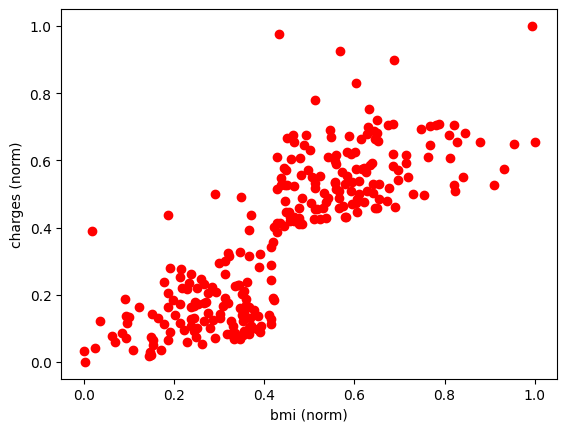

In [ ]:
plt.scatter(X_norm, Y_norm, color = "red")
plt.xlabel("bmi (norm)")
plt.ylabel("charges (norm)")
plt.show()

**HUẤN LUYỆN MÔ HÌNH**

In [ ]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size = 0.3, random_state = 16)
model.fit(x_train, y_train)

LinearRegression()

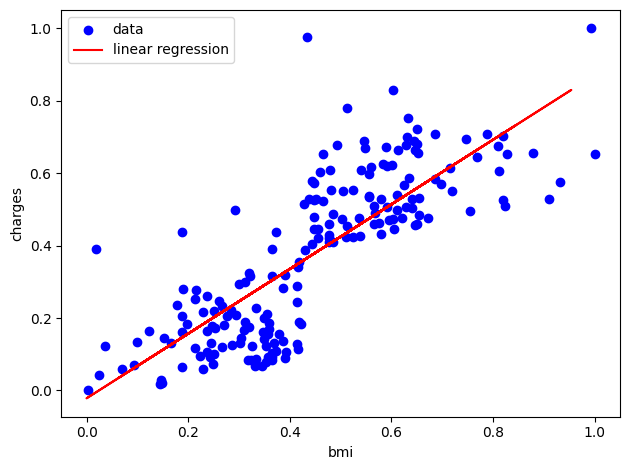

In [ ]:
y_pred = model.predict(x_test)
plt.scatter(x_train, y_train, color = "blue", label = "data")
plt.plot(x_test, y_pred, color = "red", label = "linear regression")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.tight_layout()
plt.legend()
plt.show()